## What is Tensorflow?
 - a deep learning/neumerical computing library
 - used to build deep learning and neural network models to gain insights out of unstructured data.
     - photos
     - audio
     - Natural Language Text

## Why Tensorflow?

- write fast deep learning code in Python ( able to run on a GPU)
    GPU is much faster than CPU
- able to access many pre built deep learning models
- Whole stack: preprocess, model, deploy
- Originally designed and used in-house by Google (now open-source) 

### What is deep learning?
   - just anoher form of machine learning and neural networks.
    
### What is neural networks and Deep Learning?
   - A neural network looks at an image, ex. a dog, converts it into numbers and the nodes of the Neural networks picks up patterns of that image. 
       - what a leg looks like
       - what the eyes look like
   - It then associates those patterns with the label of that image thus training itself.  
       
   - Deep learning means more and more layers of neural networks, meaning more and more nodes that are picking up more and more features and associaing those features/patterns wih the label of that image
       


### What kind of deep learning problems are there?

- Classification  (Binary/Multiclass Classification)
- Sequence to Sequence 
- Object Detection - trying to figure out where a specic object is within an image.

### What is transfer learning? Why use Transfer learning?
- Take what you know in one domain and apply it to another.
- Starting from scratch can be expensive and time consuming.
- Why not take advantage of whats aleady out there?

## What are we going to cover? 

- An end to end multi class classification workflow with Tensorflow 
- Preprocessing image data (getting it into Tensors)
- Choosing a deep learning model
- Fitting a model to the data (learning patterns)
- Making predictions with a model (using patterns)
- Evaluating model predictions
- Saving and loading models
- Using a trained model to make predictions on custom data

1. Problem
  - Identifying the breed of a dog from a picture

2. Data
  - Data is from Kaggle's dog breed identificaiton competition 
  https://www.kaggle.com/competitions/dog-breed-identification/overview
  
3. Evaluation 
 - Kaggle's evaluation metric: Multi Class Log Loss 
 - Evaluation file has prediction probabilities for each dog breed of each test image
 
4. Features
 - Unstructured Data (images)
 - Multiclass Classification (120 labels)
 - Train data 10,000+  images (with labels)
 - Test data 10,000+  images 

5. Framework
 - Unstructured data, therefore deep learning/transfer learning

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import random
import os
%load_ext tensorboard

2023-03-23 08:20:08.530223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.__version__

'2.10.0'

### Getting Data Ready  
- Data has to be in numerical format (Tensors)

### Labels 

In [3]:
train_labels_df = pd.read_csv("dog-breed-identification/labels.csv")

In [4]:
train_labels_df.describe()
train_labels_df

id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]

#### Observation: 10222 labels with 120 unique breeds

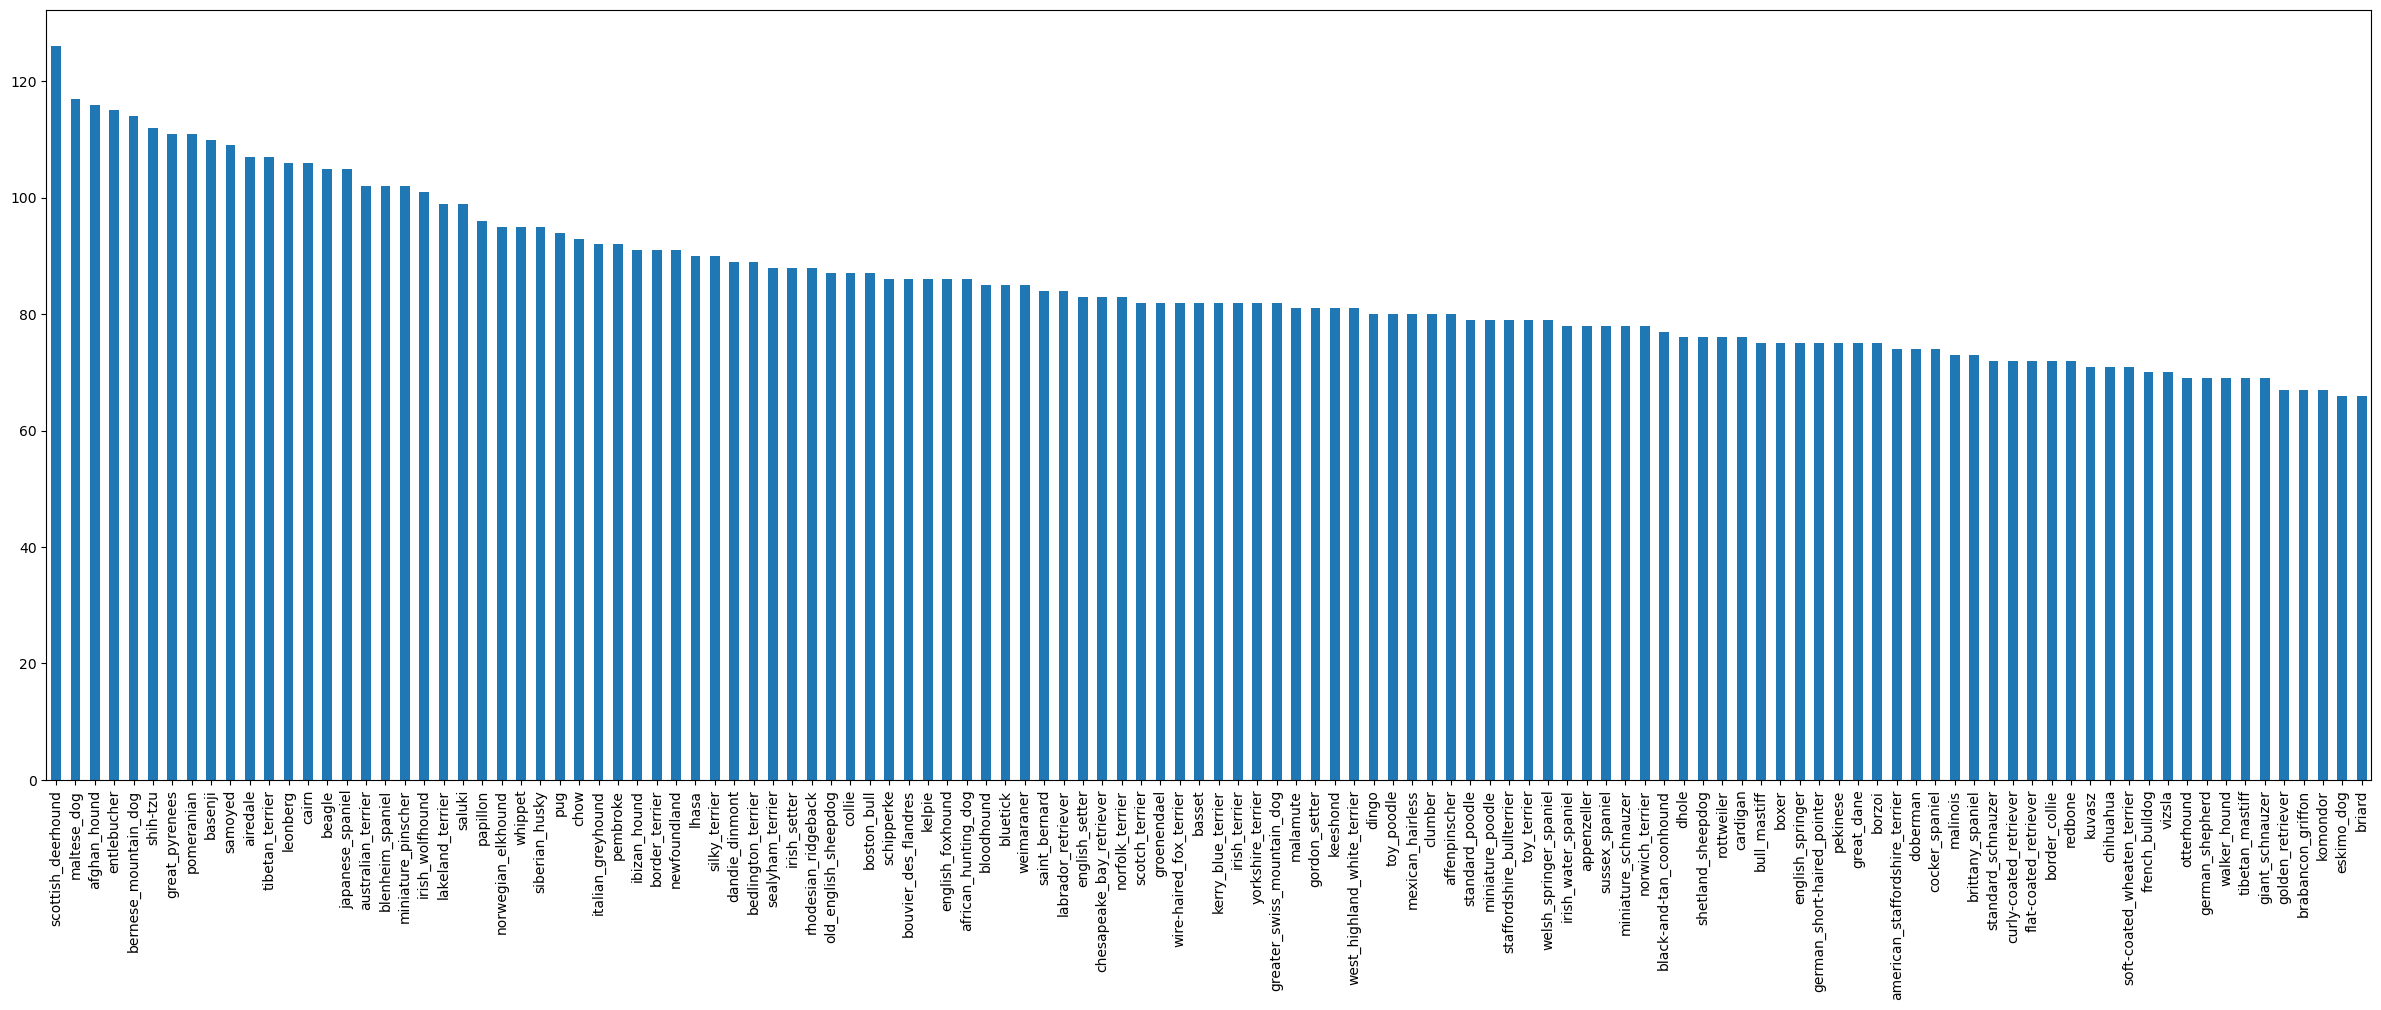

In [5]:
train_labels_df.breed.value_counts().mean()
train_labels_df.breed.value_counts().median()
train_labels_df.breed.value_counts().plot.bar(figsize = (30,10));

#### Observation: Distribution of images per class/dog breed is relatively even

### Create lists of Image's filepaths
- train_file_paths
- test_file_paths


In [6]:
#Create list of all the Train image's filepaths
train_dir = "dog-breed-identification/train/"
train_file_paths = [train_dir+file+".jpg" for file in train_labels_df.id]
 


In [7]:
test_file_paths = []
test_dir = "dog-breed-identification/test/"

test_files = os.listdir(test_dir)
test_file_paths=[test_dir+ i for i in test_files]

### View random images from Train Directory

- Create a function to view random Train images and labels

In [8]:
def random_train_image():
    
    '''
    Displays Random image from train files
    '''
    
    train_dir = "dog-breed-identification/train/"
    files = train_labels_df.id
    file = random.choice(files)
    img_title = np.array(train_labels_df.breed[train_labels_df.id == file])

    fig, ax = plt.subplots(figsize = (10,5))
    ax.imshow(plt.imread(train_dir+file+".jpg"))
    ax.set(title=img_title[0]);
    ax.axis(False);


### One hot encode labels
- turn them into booleans 
-


In [9]:
labels = np.array(train_labels_df.breed)
unique_labels = np.unique(labels)

In [10]:
labels[0] in unique_labels

True

In [11]:
labels[0]==unique_labels

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [12]:
boolean_labels = []
for label in labels:
    boolean_labels.append(label == unique_labels)

In [13]:
boolean_labels[2].astype("int"), 
np.argmax(boolean_labels[2])

85

# Split train set into Train and Validation set

In [14]:
>>> from sklearn.model_selection import train_test_split


X = train_file_paths[:1000]
y = boolean_labels[:1000]



X_train, X_val, y_train, y_val = train_test_split(X, 
                                                   y, 
                                                   test_size=0.20, 
                                                   random_state=42)
    
X_test = test_files

In [15]:
len(X_train), len(y_train), len(X_val), len(y_val), len(X_test)

(800, 800, 200, 200, 10357)

In [16]:
#X_train[:5], y_train[:5]

## Preprocessing Images (turning images into Tensors)

###  Convert Image into an array

In [17]:
image = plt.imread(X_train[1])
image.max(),image.min()

(255, 0)

### Key note:
Shape has 3 dimensions. 
   - height 
   - width
   -color channels - 
       - red, green, blue 
       - values that range from 0 - 255
    

### Convert array to Tensor

In [18]:
tensor = tf.constant(image)
tensor.shape


2023-03-23 08:20:16.586064: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorShape([188, 250, 3])

## Create a preprocessing function that 

- takes filepath as input
- uses tensorflow to read the image 
- turn it into an interger tensor
- normalize/scale the integers
- resize to be a shape of (224,224)
- return the modified image

In [19]:
#preprocess_image 

image = X_train[10]
image

'dog-breed-identification/train/019ff93e03802e661577b5869e099dcb.jpg'

In [20]:

image_path = X_train[10]

def process_x(image_path):
    
    '''
    takes an image's file path and converts it into a tensor
    
    '''
    
    image = tf.io.read_file(image_path) 
    #reads an image file path

    image = tf.image.decode_jpeg(image, 3) 
    #turns image into a numerical tensor with 3 color channels

    image = tf.image.convert_image_dtype(image, tf.float32)
    #scales the tensor values

    image = tf.image.resize(image, size = [224, 224])
    #resizes the tensor to shape (224, 224, 3)

    return image

# Turning Data into Batches

### Key Note:
#### Why turn them into batches?

- If youre trying to process 10,000+ images in one go... they all might not fit into memory.
- Therefore, generally its recommeded to do batch sizes of 32 images at time

### Key note: 
-  In order to feed data into the Model, X,y has to be 
  - in Tensors
  - in tuple format

## Create a preprocessing function that 
- takes in image_path and label
- returns image and label in tensors and in Tuple format

In [21]:
def process_x_y (image_path, label):
    
    '''
     Takes in image_path and label,
     returns image as numerical tensor with label in tuple format
    
    '''
    image = process_x(image_path) #transforms X to numerical tensor
    return image, label #returns (x,y) in tuple format2
    

In [22]:
process_x_y(X_train[21], y_train[21])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.47140232, 0.54627955, 0.6023635 ],
         [0.40317824, 0.47713658, 0.49771607],
         [0.35664213, 0.43576857, 0.4008059 ],
         ...,
         [0.0426546 , 0.08960722, 0.01149446],
         [0.01706518, 0.0433818 , 0.02499678],
         [0.02732903, 0.06454839, 0.06062682]],
 
        [[0.51851296, 0.63496083, 0.68252736],
         [0.47011074, 0.5835235 , 0.61000913],
         [0.35422084, 0.46063718, 0.43891448],
         ...,
         [0.03163334, 0.07477059, 0.00846632],
         [0.10526318, 0.14840043, 0.11939568],
         [0.12696058, 0.17009783, 0.15432402]],
 
        [[0.51726836, 0.6780164 , 0.7093575 ],
         [0.498554  , 0.65312326, 0.67246854],
         [0.33315817, 0.47712696, 0.46390337],
         ...,
         [0.02144611, 0.06189604, 0.01321779],
         [0.04915984, 0.08960976, 0.05633251],
         [0.05997117, 0.1004211 , 0.07151704]],
 
        ...,
 
        [[0.75551057, 0.6927655 

avaialble functions:

- process_x() - converts X to numerical tensors
- process_x_y() - converts X to numerical tensors and returns tuple (x,y)
- .shuffle() - shuffles dataset
- .batch() - batches dataset
    

## Key note: 
In order to train model, data has to be
- In a tuple format dataset
    - in tensors (X as numerical)
    - shuffled
    - in batches
    


### Train data batch

In [23]:
data_train = tf.data.Dataset.from_tensor_slices(  #creates a dataset
    (tf.constant(X_train), tf.constant(y_train)))
# dataset(tensor(image_file_paths), tensor(image_labels))                                             )
   
    
data_train = data_train.shuffle(buffer_size = len(data_train))
    #dataset is shuffled
    

data_train = data_train.map(process_x_y) 
# converts tensor x to numerical tensors, adjusts image size.
# returns tensor y as is
    
    
data_train = data_train.batch(batch_size=32)
    #data is in batched



In [24]:
data_train

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

### Validation data batch

In [25]:
data_val = tf.data.Dataset.from_tensor_slices(
    (tf.constant(X_val), tf.constant(y_val))
)

data_val = data_val.map(process_x_y).batch(32)



In [26]:
data_train, data_val

(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>)

### Test data batch

In [27]:
data_test = tf.data.Dataset.from_tensor_slices(tf.constant(test_file_paths))

data_test = data_test.map(process_x).batch(32)
data_test

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

### Preprocesing Function

- create a preprocessing function that returns dataset after formatting data to meet model requirements 


- Train data has to be

 - in dataset
 - in tensors (X as numerical)
 - in tuple format
 - shuffled
 - in batches
 
 
- Validation data has to be

 - in dataset
 - in tensors (X as numerical)
 - in tuple format
 - in batches
 
- Test data (no labels) has to be 
 - in dataset
 - in numerical tensors
 - in batched

In [28]:
def data_preprocessing(X, y, train_data = False, validation_data = False, test_data = False):
    
    
    if train_data:
        
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))                                           
        data = data.shuffle(buffer_size = len(data))
        data = data.map(process_x_y) 
        data = data.batch(batch_size=32)

    elif validation_data:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data = data.map(process_x_y).batch(32)
    
    elif test_data:   
        data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
        data = data.map(process_x).batch(32)

        
    return data
       


In [29]:
data_train = data_preprocessing(X_train, y_train, train_data = True)
data_val = data_preprocessing(X_val, y_val, validation_data = True)
data_test = data_preprocessing(X_test, y = None, test_data=True)

In [30]:
data_train, data_val, data_test

(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>,
 <BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>)

## Visualizing Data 

In [31]:
sample = data_train.as_numpy_iterator()
# unwinds data into batches of a numpy iterator

batch = next(sample)
#next grabs the first batch,

images, labels = batch
#batch includes 32 images and 32 labels

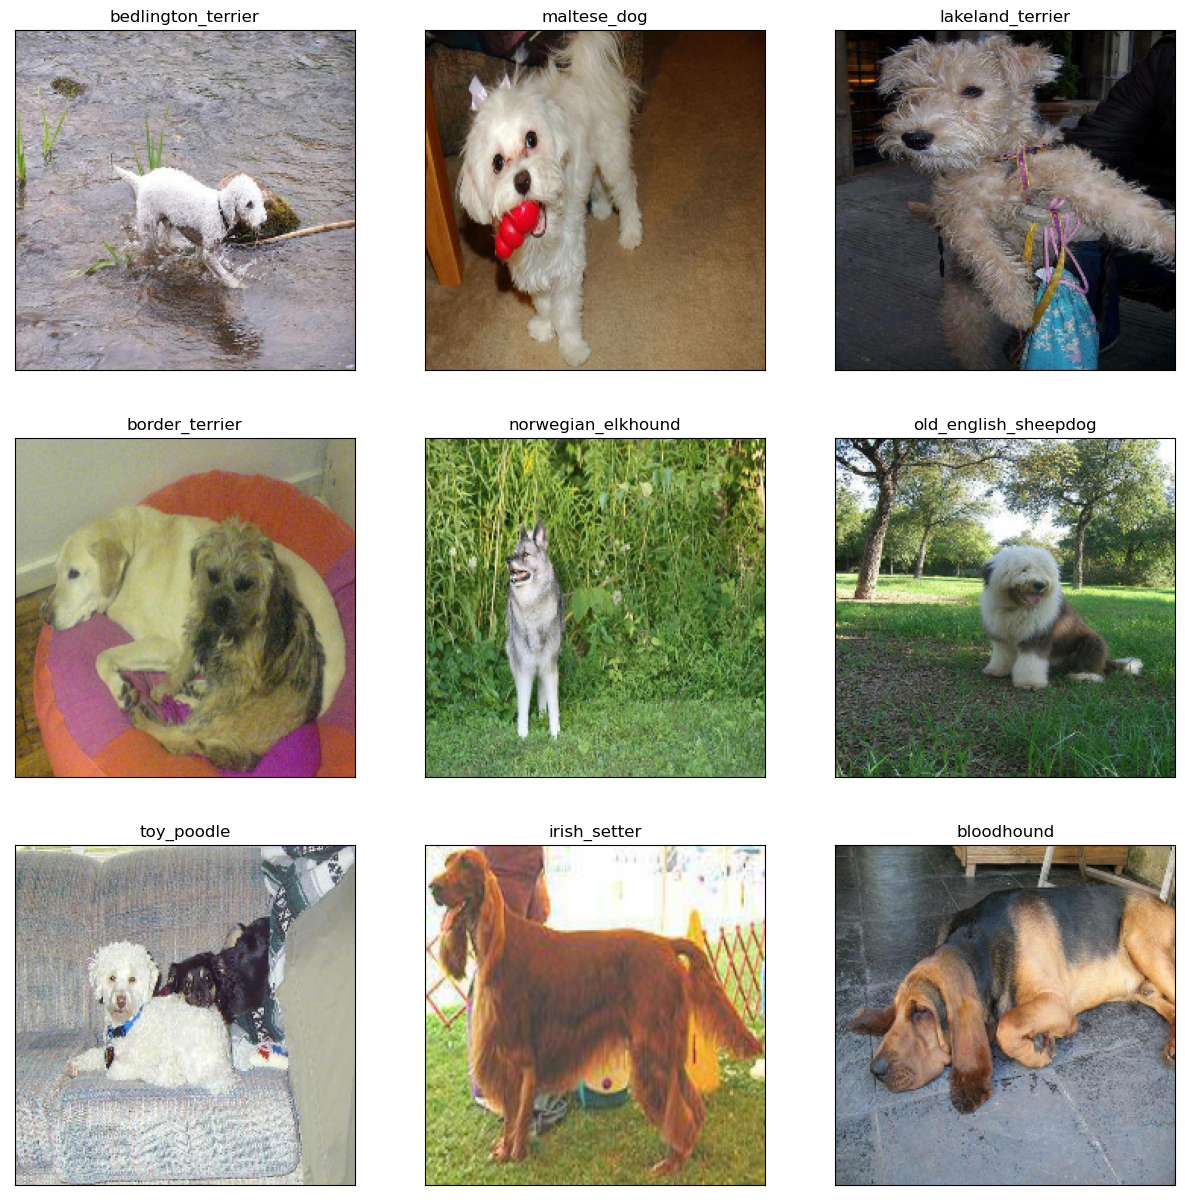

In [32]:
plt.figure(figsize=(15,15))

for i in range(9):
    ax = plt.subplot(3,3, i + 1)
    plt.imshow(images[i])
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title(unique_labels[np.argmax(labels[i])])                 

 

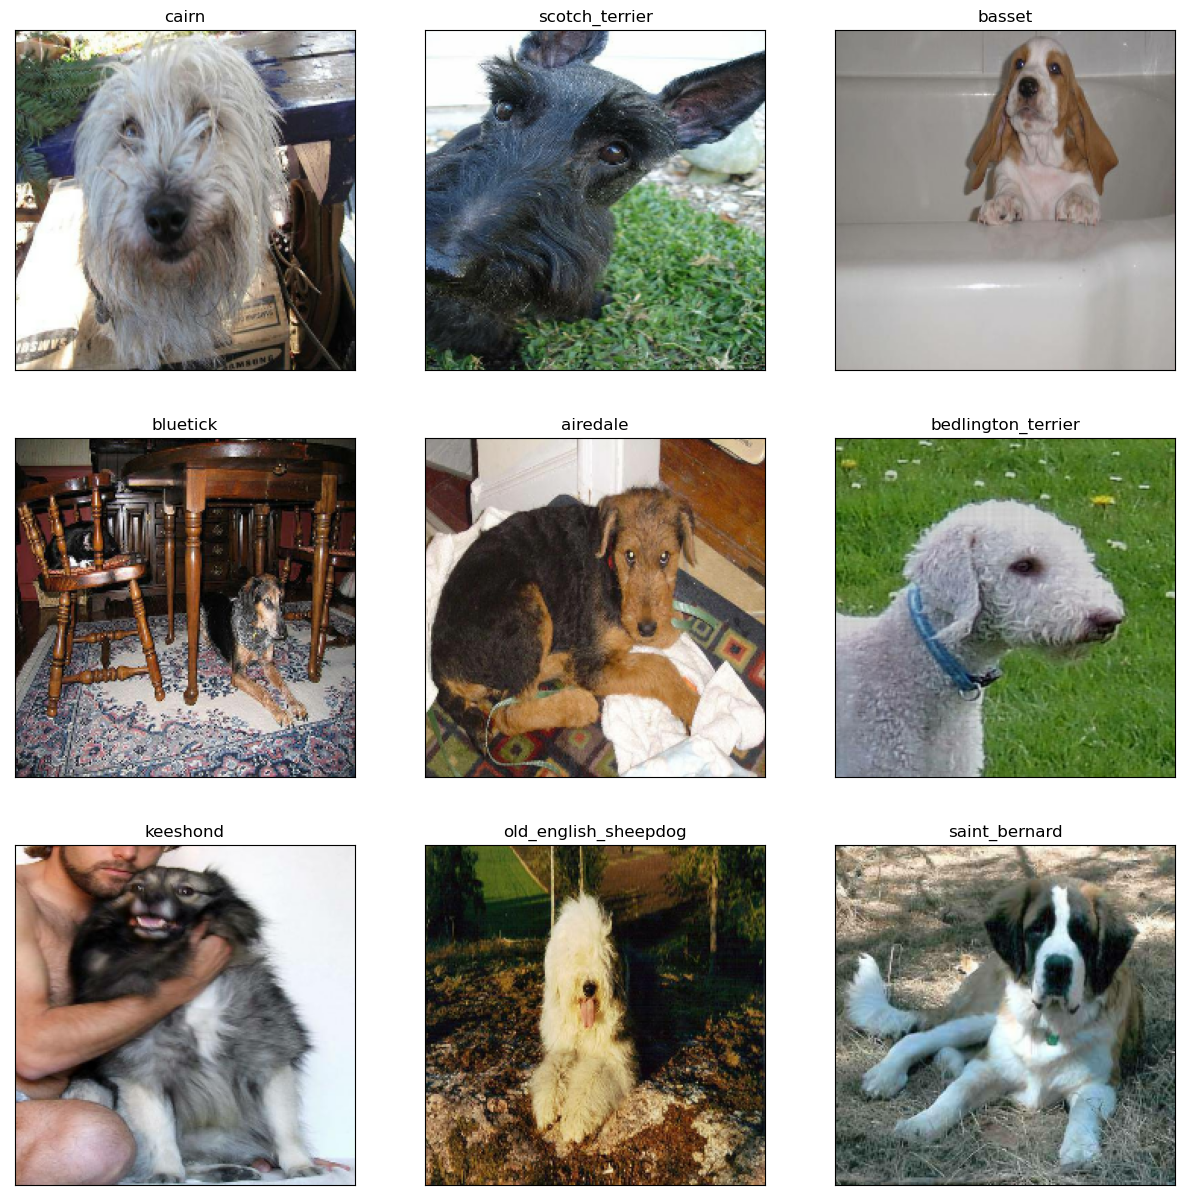

In [33]:
#data = data_val.as_numpy_iterator()
images, labels = next(data_val.as_numpy_iterator())

plt.figure(figsize = (15,15))
for i in range(9):
    ax = plt.subplot(3,3, i + 1)
    plt.imshow(images[i])
    plt.title(unique_labels[np.argmax(labels[i])])
    ax.set_xticks([])
    ax.set_yticks([])
    

## Create a function to visualize data

In [34]:
def visualize_data(validation_data= False):
    
    if validation_data:
        images, labels = next(data_val.as_numpy_iterator())
    else:
        images, labels = next(data_train.as_numpy_iterator())
   
    plt.figure(figsize=(15,15))
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i])
        plt.title(unique_labels[np.argmax(labels[i])])
        ax.set_xticks([])
        ax.set_yticks([])
    
    

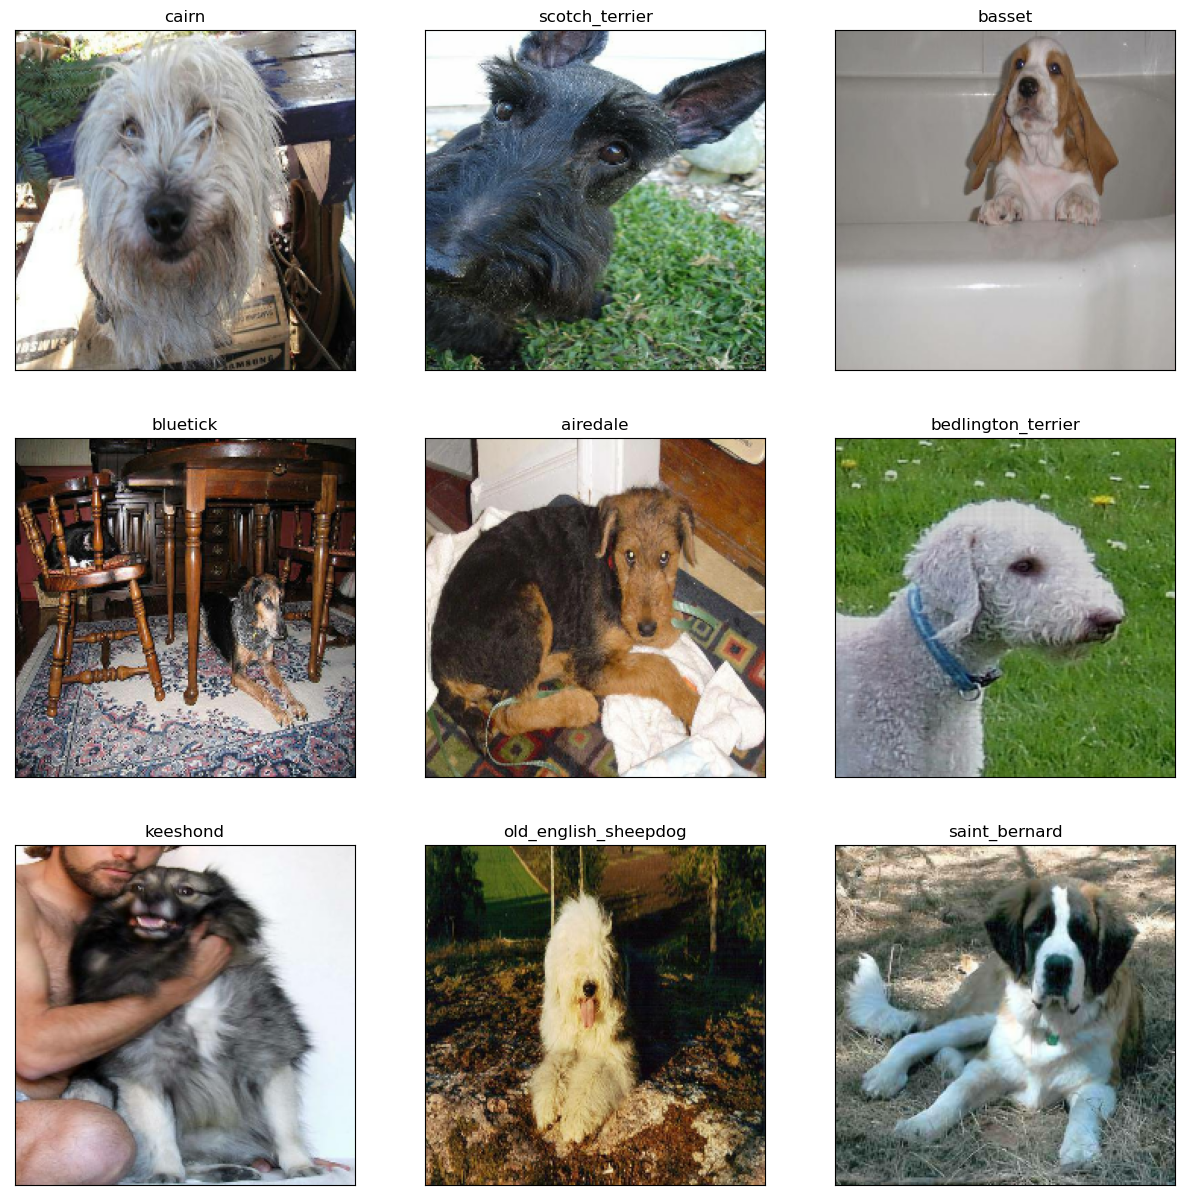

In [35]:
visualize_data(validation_data=True)


# Building a model using a Pretrained Model

In [36]:
images.shape

input_shape = [None, 224, 224, 3]
output_shape = (len(unique_labels))
model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


### key_note:
- mobilenet_v2_130_224 has a batch input shape of [None, 224, 224, 3]
 - our data's input shape has to match with mobilenet's input shape

In [37]:
model = tf.keras.Sequential([
    hub.KerasLayer(model_url, name = ("pretrained_model")),
    tf.keras.layers.Dense(len(unique_labels),
                          activation = "softmax",
                          name = ("output_layer"))
])

model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics="accuracy"
)

model.build(input_shape)



In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pretrained_model (KerasLaye  (None, 1001)             5432713   
 r)                                                              
                                                                 
 output_layer (Dense)        (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Functionize Creating Model
- creates and compiles and builds a model with parameters
    - input_shape, output_shape, model_url

In [39]:
images.shape

input_shape = (None, 224, 224, 3)
output_shape = (len(unique_labels))
model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


In [40]:
def create_model (input_shape = input_shape, output_shape=output_shape, model_url = model_url):

    
    '''
    creates model using pretrained model mobilenet_v2 from tensorflow hub
    '''
    
    model = tf.keras.Sequential([
        hub.KerasLayer(model_url, 
                       name = ("pretrained_model")),
        tf.keras.layers.Dense(output_shape,
                              activation = "softmax",
                              name = ("output_layer"))
    ])
    
    model.compile(loss = tf.keras.losses.categorical_crossentropy,
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics="accuracy"
    )
    
    model.build(input_shape) #to use mobilenet, 
    #model has to be built with this shape
    
    print(f'Building model using pretatined model {model_url}')
    
    
    return model

In [41]:
model = create_model(input_shape, output_shape, model_url)

Building model using pretatined model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pretrained_model (KerasLaye  (None, 1001)             5432713   
 r)                                                              
                                                                 
 output_layer (Dense)        (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Key Note: 
    - pretrained model's parameters are non trainable.
    - dense layers parameters are trainable

### Callbacks 
- functions that can be passed to model's fit, evaluate and predict to
    - save model's progress (tensorboard)
    - check model's progress
    - stop training early if model is no longer inproving (early stopping) to prevent overfitting

## Create two callbacks

- Tensorboard - helps monitor model's performance while training
- Early stopping - prevents overfitting by stopping model when metric stops improving

### Tensorboard callback

3 steps for setting up Tensorboard
   - Load the Tensorboard Extension
   - Create a Tensorboard callback which is able to save logs to a directory and pass it to model's fit function
   - Visualize model's training logs with '%tensorboard' magic function

### Create a function that build a Tensorboard callback
    

In [43]:
import datetime
import os

def create_tensorboard_callback():
    
    logdir = os.path.join("logs",
                    datetime.datetime.now().strftime("%m%d%Y -%H%M$S"))
    
    #log dir stores information in the given dir witg the formatted time
    
    return tf.keras.callbacks.TensorBoard(logdir)
            

### Early Stopping callback


In [44]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                 patience=3
                                                 )
#if no improvement after 3 epochs, stop model                                             
                                                 

## Create a function that trains a model (model.fit())

In [45]:
model=create_model(input_shape = input_shape, 
             output_shape=output_shape,
            model_url=model_url)

Building model using pretatined model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [46]:
def train_model():

    
    #create and compile model  
    model=create_model(input_shape = input_shape, 
                 output_shape=output_shape,
                model_url=model_url)

    
    #create instance of tensorboard
    tensorboard = create_tensorboard_callback()

    
    
    #fit_model
    model_history =  model.fit(data_train,
                              epochs=25, 
                              steps_per_epoch= len(data_train),
                              callbacks=[tensorboard, early_stopping],
                              validation_data=data_val,
                               validation_steps=len(data_val)                                           
)
        
        
    return model, model_history

#epochs = how many times model goes through train dataset to find patterns



### Key notes:

#### epochs: 
   - number of times model gets to go over train data.
   - one epoch is one iteration over train dataset

#### validation_freq:
   - how often should model test the patterns found in train data on validation data
   - 1, once per epoch

In [47]:
model, model_history = train_model()

Building model using pretatined model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/25
25/25 [==============================] - 34s 1s/step - loss: 4.5370 - accuracy: 0.1075 - val_loss: 3.5059 - val_accuracy: 0.2300
Epoch 2/25
25/25 [==============================] - 28s 1s/step - loss: 1.6034 - accuracy: 0.7138 - val_loss: 2.2246 - val_accuracy: 0.4700
Epoch 3/25
25/25 [==============================] - 20s 808ms/step - loss: 0.5690 - accuracy: 0.9375 - val_loss: 1.7524 - val_accuracy: 0.5500
Epoch 4/25
25/25 [==============================] - 14s 561ms/step - loss: 0.2545 - accuracy: 0.9825 - val_loss: 1.5549 - val_accuracy: 0.6050
Epoch 5/25
25/25 [==============================] - 13s 521ms/step - loss: 0.1498 - accuracy: 0.9937 - val_loss: 1.4702 - val_accuracy: 0.6300
Epoch 6/25
25/25 [==============================] - 13s 535ms/step - loss: 0.1015 - accuracy: 0.9975 - val_loss: 1.4363 - val_accuracy: 0.6100
Epoch 7/25
25/25 [====================

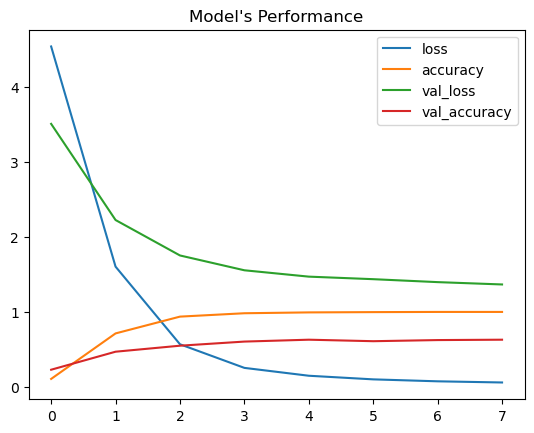

In [48]:
pd.DataFrame(model_history.history).plot(title = "Model's Performance");

### Observation:
 - model stopped short due to early stopping. 
 - model is overfitting. (performing very well on train data but struggling on validation data)
    - model is practically memorizing the train data but not understanding the patterns or the concepts. Therefore it is not able to replicate the results on validation data
    - overfitting to begin with is a good thing. It means model is learning!

#### What are some ways to prevent model overfitting

# Making predictions


### Use trained model to make predictions on validation data

In [49]:
predictions_val = model.predict(data_val)
evaluation_val = model.evaluate(data_val)
            

7/7 [==============================] - 3s 346ms/step - loss: 1.3660 - accuracy: 0.6300


### Unbatching Data
Create a function that unbatches given dataset and returns 
- images in the form of arrays
- labels as breed name

In [50]:
def data_unbatching(dataset):

    images = []
    labels = []

    for image, label in dataset.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(label)
    
    return images, labels


### Visualize images with their true labels


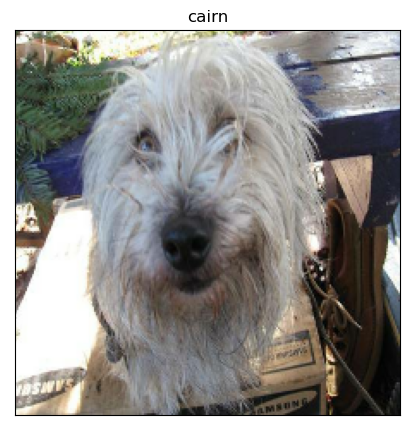

In [51]:
#Visualize images with their true labels
images, labels = data_unbatching(data_val)

fig, ax = plt.subplots(figsize= (5,5))
plt.imshow(images[0]),
plt.title(unique_labels[np.argmax(labels[0])])
ax.set_xticks([])
ax.set_yticks([]);

### Compare Predicted labels with True Labels

Create a function that 
- plots an image, 
- Title shows predicted labels, confidence interval, and true label

In [52]:
#Visualize Predictions with their true labels

def compare_predictions(n):

    '''
    
    Visualize model's predicted label and true label of image at given index of validation data
    
    '''
    
    
    images, labels = data_unbatching(data_val)
 
    true_breed = unique_labels[np.argmax(labels[n])]
    max_pred_prob = round(max(predictions_val[n])*100)
    predicted_breed = unique_labels[np.argmax(predictions_val[n])]
    
    if true_breed == predicted_breed:
        color = "green"
    else:
        color = "red"



    fig, ax = plt.subplots(figsize= (10,5))
    plt.imshow(images[n]),
    plt.title("Predicted: {}, Confidence: {}%, Actual: {}".format(predicted_breed, max_pred_prob,true_breed),color= color)
    ax.set_xticks([])
    ax.set_yticks([]);
    
    


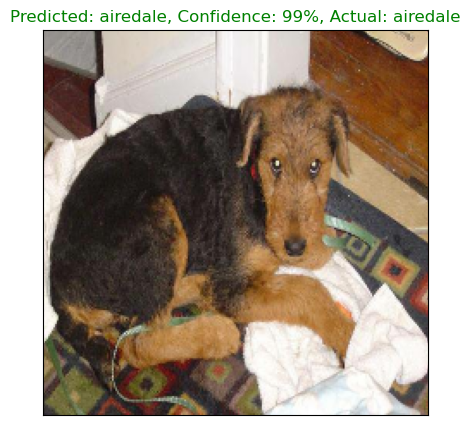

In [53]:
compare_predictions(4)

###  Prediction Probabilities 
- Create a function that 
    - shows the models top 10 predictions
    - on bar graph
    -  validation dataset's images as index parameter

In [54]:

def view_pred_prob(n):
    
    '''
    view model's top ten predictions and probailities on an bar grpah
    '''
    
    
    images, labels = data_unbatching(data_val)
    true_label = unique_labels[np.argmax(labels[n])]
    predicted_label = unique_labels[np.argmax(predictions_val[n])]



    sorted = np.argsort(predictions_val[n])[-10:][::-1]
    sorted_labels = unique_labels[sorted]

    predicted_probs = predictions_val[n]
    predicted_probs_top_10 = predicted_probs[sorted] 

    top_plot = plt.bar(sorted_labels, predicted_probs_top_10, color = "black");
    plt.xticks(rotation = "vertical" );
 
    if true_label in sorted_labels: 
        top_plot[np.argmax([true_label == sorted_labels])].set_color("lightgreen");
        


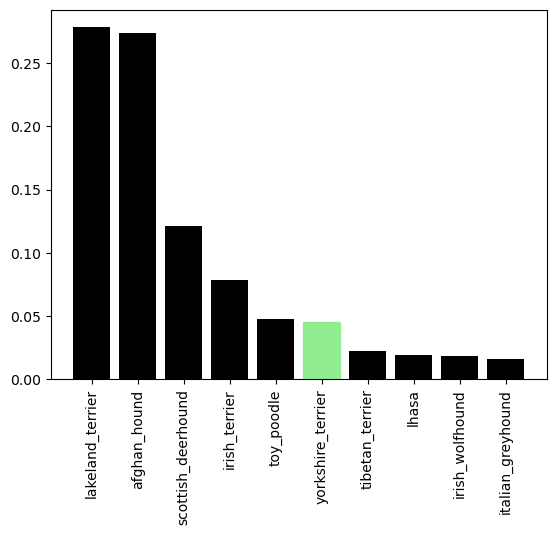

In [55]:
view_pred_prob(10);

## Saving and Loading our Trained model

### Create a function to save a trained model

In [56]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [57]:
#save model
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: models/20230323-08231679574185-1000-images-mobilenetv2-Adam.h5...


'models/20230323-08231679574185-1000-images-mobilenetv2-Adam.h5'

### Create a function to load a trained model

In [58]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})

#custom_objects is necessary when model includes non traditional layer(efficicent_net_model)
  return model

In [59]:
#load model
loaded_1000_image_model = load_model("models/20230320-18111679350263-1000-images-mobilenetv2-Adam.h5")

Loading saved model from: models/20230320-18111679350263-1000-images-mobilenetv2-Adam.h5


In [60]:
#model.evaluate(data_val) == loaded_1000_image_model.evaluate(data_val)

### Observation: 
 - The evalutions of both existing and loaded model are the same

# Training Model on full Dataset

In [61]:
 

X = train_file_paths
y = boolean_labels

test_dir = "dog-breed-identification/test/"

test_files = os.listdir(test_dir)
test_file_paths=[test_dir+ i for i in test_files]
X_test = test_files

In [62]:
len(X),len(y), len(test_files)

(10222, 10222, 10357)

In [63]:
data_full = data_preprocessing(X=X, y=y, train_data=True)

In [64]:
full_images, full_labels = data_unbatching(data_full)

### Create model instance


In [65]:
full_model = create_model()

Building model using pretatined model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


### Create tensorboard instance


In [66]:
full_model_tensorboard = create_tensorboard_callback()

### Early stopping callback instance

key note: model is being trained on all data, including validation, there more it will have to monitor something else. ie.accuracy 


In [67]:

full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                 patience=3
                                                 )

### Fit Model on all Data

In [68]:
# full_model_history =  full_model.fit(data_full,
#                             epochs=100, 
#                             callbacks=[full_model_tensorboard, full_model_early_stopping],
                                                                      
# )

In [69]:
#pd.DataFrame(full_model_history.history).plot(title = "Full Model's Performance");

### Save full_model


In [70]:
save_model(full_model, suffix="full-images-mobilenetv2-Adam")

Saving model to: models/20230323-08231679574194-full-images-mobilenetv2-Adam.h5...


'models/20230323-08231679574194-full-images-mobilenetv2-Adam.h5'

### Load full_model


In [75]:
loaded_full_model = load_model("models/20230320-21181679361480-full-images-mobilenetv2-Adam.h5")

Loading saved model from: models/20230320-21181679361480-full-images-mobilenetv2-Adam.h5


## Making predictions on Test Dataset

### Preprocess test dataset

In [72]:
data_test = data_preprocessing(test_file_paths, y = None, test_data=True)

### Make predictions on test data


In [73]:
#test_predictions = loaded_full_model.predict(data_test)

### Save predictions to csv file

In [74]:
np.savetxt("predictions/preds_array.csv", test_predictions, delimiter=',')

NameError: name 'test_predictions' is not defined

### Load predictions from CSV file

In [ ]:
test_predictions_loaded = np.loadtxt("predictions/preds_array.csv", delimiter=',')

# Preparing File for Kaggle Submission
    
- Kaggle's sample submission is a csv file including 
    
- Columns: 
 - picture id
 - unique breeds
- Data: 
  - id names
  -prediction confidence for each breed

### Extracting image id from image_file names

In [ ]:
id_list = [path.split(".jpg")[0] for path in os.listdir(test_dir)]

In [ ]:
test_predictions_df = pd.DataFrame(data = test_predictions_loaded,
            columns= list(unique_labels))

test_predictions_df.insert(0,"id", id_list)

test_predictions_df.head()

### Exporting DF to CSV file

In [ ]:
test_predictions_df.to_csv("kaggle_submission_file/submission_file.csv",
                             index= False)

# Making Predictions on Custom Images

In [ ]:
def custom_image_prediction(image_dir):

    
    '''
    Takes a file of dog images, returns a data frame of Image ID's and Model's predictions and plots images with predictions as titles
    '''
    
    
    
    #creating file paths to custom images   
    custom_images = list(os.listdir(image_dir))
    
    if ".DS_Store" in custom_images:
        custom_images.remove(".DS_Store")

    custom_images_filepaths = [custom_image_dir  +fname for fname in custom_images]


    #preprocessing custom images
    data_custom_images = data_preprocessing(custom_images_filepaths, y= False, test_data=True)

    
    #predicting on custom images
    predictions_custom_images = loaded_full_model.predict(data_custom_images, verbose=False)


    #lists image id and model's prediction on image
    custom_images_id = [items.split(".jpeg")[0] for items in custom_images]
    predictions_custom_images_labels = [unique_labels[np.argmax(i)] for i in predictions_custom_images]

    #create a DF with columns image id & model's prediction
    custom_images_df = pd.DataFrame({"Image_ID": custom_images_id,
                                    "Prediction": predictions_custom_images_labels})
    
    
    
    
    
    
    
    custom_images_tensors = []

    for items in data_custom_images.unbatch().as_numpy_iterator():
        custom_images_tensors.append(items)
    
    plt.figure(figsize=(15,20))
    for num, image in enumerate(custom_images_tensors):
        
        if len(custom_images_tensors) % 2 == 0:
 
            plt.subplot(int(len(custom_images_tensors)/2), 2, num+1)
        else:
 
            plt.subplot(len(custom_images_tensors), 1, num+1)

        
        plt.xticks([])
        plt.yticks([])
        plt.title(predictions_custom_images_labels[num])
        plt.imshow(image)
    
    
    return custom_images_df




In [ ]:
custom_image_prediction(image_dir="custom_dog_photos")